In [1]:
# Basic library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from tqdm import tqdm, tnrange, tqdm_notebook
from itertools import cycle
from pprint import pprint


# Data preprocessing
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import SMOTE
from sklearn.utils import resample


from sklearn.linear_model import LogisticRegression


# Evaluation
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.externals import joblib

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Display and Parameter Setting

In [2]:
# Set dataframe display
pd.set_option('display.max_columns', None)  # default = 20
pd.set_option('display.expand_frame_repr', False) # default = True
pd.set_option('display.max_colwidth', -1) # default = 50

In [3]:
seed_num = 7

# Import Data

In [4]:
# https://towardsdatascience.com/why-and-how-to-use-pandas-with-large-data-9594dda2ea4c
# read the large csv file with specified chunksize 

df_chunk = pd.read_csv(r'./data/avazu-ctr-prediction/train.csv', chunksize=100000)

In [5]:
chunk_list = []  # append each chunk df here 

start = time()

# Each chunk is in df format
print('Loading DataFrame to List.... ') 
for chunk in df_chunk:  
    # perform data filtering 
#     chunk_filter = chunk_preprocessing(chunk)
    
    # Once the data filtering is done, append the chunk to list
#     chunk_list.append(chunk_filter)
    chunk_list.append(chunk)
      
t = time() - start
print('Execution time = ', t, ' seconds')

print('Combine All DataFrame.... ') 
# concat the list into dataframe 
df_concat = pd.concat(chunk_list)
t = time() - start
print('Execution time = ', t, ' seconds')

Loading DataFrame to List.... 
Execution time =  185.22144103050232  seconds
Combine All DataFrame.... 
Execution time =  251.3467619419098  seconds


In [6]:
start = time()

df_sam = df_concat.sample(n=300000,random_state=seed_num)

t = time() - start
print('Execution time = ', t, ' seconds')

Execution time =  114.22681021690369  seconds


In [7]:
df_sam.describe(include='all')

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,3.000000e+05,300000.000000,3.000000e+05,300000.000000,300000.000000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
unique,NaN,NaN,NaN,NaN,NaN,2011,1981,22,2095,125,24,48717,203429,4117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,a99f214a,6b9769f2,8a4875bd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,108577,112540,122777,191423,201942,193924,247632,1571,18001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.218497e+18,0.170203,1.410256e+07,1004.970040,0.287483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.016347,0.331523,18843.044873,318.896413,59.911580,2112.688697,1.427283,226.911587,53250.981227,83.536117
std,5.332471e+18,0.375812,2.968903e+02,1.094462,0.503691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.528697,0.854559,4958.317594,21.039796,46.684169,609.719319,1.325523,350.804371,49954.705558,70.326656
min,3.176948e+13,0.000000,1.410210e+07,1001.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000
25%,4.598148e+18,0.000000,1.410230e+07,1005.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000
50%,9.225930e+18,0.000000,1.410260e+07,1005.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000
75%,1.383944e+19,0.000000,1.410281e+07,1005.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100088.000000,102.000000


In [9]:
# df = pd.read_csv('./data/avazu-ctr-prediction/train.csv', nrows=300000)
# df.describe(include='all')
# df = df_concat.sample(n=300000,random_state=seed_num)
df = df_sam.copy()

In [10]:
# df = df.drop(['id','hour'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 32509287 to 33935746
Data columns (total 24 columns):
id                  300000 non-null float64
click               300000 non-null int64
hour                300000 non-null int64
C1                  300000 non-null int64
banner_pos          300000 non-null int64
site_id             300000 non-null object
site_domain         300000 non-null object
site_category       300000 non-null object
app_id              300000 non-null object
app_domain          300000 non-null object
app_category        300000 non-null object
device_id           300000 non-null object
device_ip           300000 non-null object
device_model        300000 non-null object
device_type         300000 non-null int64
device_conn_type    300000 non-null int64
C14                 300000 non-null int64
C15                 300000 non-null int64
C16                 300000 non-null int64
C17                 300000 non-null int64
C18                 300000 no

0    248939
1    51061 
Name: click, dtype: int64


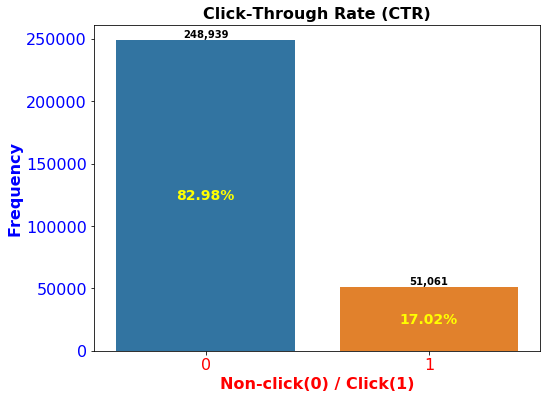

In [11]:
import matplotlib 

# Fill Paramter
fs = 16 # Font size
x_data = df
x_col = 'click' # column to count
x_hue = None # For divide column

matplotlib.rc('xtick', labelsize = fs-2)     
matplotlib.rc('ytick', labelsize = fs-2)

counts = x_data[x_col].value_counts()
max_count = max(counts)
total_count = sum(counts)
print(counts)
fig = plt.figure(figsize= (8,6))
ax = sns.countplot(x = x_col, hue = x_hue, data=x_data, order = counts.iloc[:10].index)
# fig.suptitle('test title', fontsize=12)
ax.set_title('Click-Through Rate (CTR)', fontsize = fs, fontweight='bold' )
ax.set_xlabel('Non-click(0) / Click(1)', color = 'r', fontsize = fs, fontweight='bold')
ax.set_ylabel('Frequency', color = 'b', fontsize = fs, fontweight='bold')
# plt.xticks(rotation=15, color='r', size=16)
plt.xticks(color='r', size=16)
plt.yticks(color='b', size=16)

for i, v in enumerate(counts[:10]):
        ax.text(x = i, y=v + max_count*0.01 , s='{:,}'.format(v), horizontalalignment='center', color='black', fontweight='bold')
        ax.text(x = i, y= v/2, s=str('{:.2f}'.format(v*100/total_count))+'%',
                color='yellow', fontweight='bold', size = 14,
                horizontalalignment='center', 
                verticalalignment='center' 
                )

# Convert Data Type

In [12]:
def cvt_type(df, col_list, dtype = 'category'):
    for col in col_list:
        df[col] = df[col].astype('category')
    return df

In [13]:
col_list = df.columns.to_list()
col_list.remove('id')
col_list

['click',
 'hour',
 'C1',
 'banner_pos',
 'site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21']

In [14]:
df = cvt_type(df, col_list=col_list)
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 32509287 to 33935746
Data columns (total 24 columns):
id                  300000 non-null float64
click               300000 non-null category
hour                300000 non-null category
C1                  300000 non-null category
banner_pos          300000 non-null category
site_id             300000 non-null category
site_domain         300000 non-null category
site_category       300000 non-null category
app_id              300000 non-null category
app_domain          300000 non-null category
app_category        300000 non-null category
device_id           300000 non-null category
device_ip           300000 non-null category
device_model        300000 non-null category
device_type         300000 non-null category
device_conn_type    300000 non-null category
C14                 300000 non-null category
C15                 300000 non-null category
C16                 300000 non-null category
C17                 300000

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,3.000000e+05,300000.0,300000.0,300000.0,300000.0,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000.0,300000.0,300000.0,300000.0,300000.0,300000.0,300000.0,300000.0,300000.0,300000.0
unique,NaN,2.0,240.0,7.0,7.0,2011,1981,22,2095,125,24,48717,203429,4117,4.0,4.0,1975.0,8.0,9.0,410.0,4.0,64.0,160.0,60.0
top,NaN,0.0,14102209.0,1005.0,0.0,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,a99f214a,6b9769f2,8a4875bd,1.0,0.0,4687.0,320.0,50.0,1722.0,0.0,35.0,-1.0,23.0
freq,NaN,248939.0,3470.0,275689.0,216054.0,108577,112540,122777,191423,201942,193924,247632,1571,18001,276899.0,258803.0,7090.0,280088.0,283241.0,33648.0,126155.0,90656.0,140425.0,65456.0
mean,9.218497e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.332471e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.176948e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.598148e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.225930e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.383944e+19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
from pprint import pprint
# Print unique value each column which less than 5 unique value
col_list = df.columns.tolist()
exclude_list = []
for i in col_list:
    nuni = df[i].nunique()
    print('\n{} : {}'.format(str(i),nuni))
    if nuni < 5:
        uni = df[i].unique().tolist()
        print('>>> Item Lists: {}'.format(uni))
    if nuni > 1000 or nuni < 3:
        exclude_list.append(i)    
#         pprint(f'{str(i)} Number of Unique Item: {nuni} Item Lists: {uni}')


id : 300000

click : 2
>>> Item Lists: [0, 1]

hour : 240

C1 : 7

banner_pos : 7

site_id : 2011

site_domain : 1981

site_category : 22

app_id : 2095

app_domain : 125

app_category : 24

device_id : 48717

device_ip : 203429

device_model : 4117

device_type : 4
>>> Item Lists: [1, 0, 4, 5]

device_conn_type : 4
>>> Item Lists: [0, 3, 2, 5]

C14 : 1975

C15 : 8

C16 : 9

C17 : 410

C18 : 4
>>> Item Lists: [0, 2, 3, 1]

C19 : 64

C20 : 160

C21 : 60


In [16]:
print(exclude_list)

['id', 'click', 'site_id', 'site_domain', 'app_id', 'device_id', 'device_ip', 'device_model', 'C14']


# Assign Value X and y with Feature Selection

In [17]:
X = df.drop(exclude_list, axis =1)
y = df['click']

# One Hot Encoder

In [18]:
# Get dummies
X_encoded = pd.get_dummies(X, prefix_sep='_', drop_first=True)

In [19]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 32509287 to 33935746
Columns: 1133 entries, hour_14102101 to C21_255
dtypes: uint8(1133)
memory usage: 336.4 MB


## Handle Imbalanced Data
- Due to we have a vast dataset, thus we will perform the undersampling technique for the majority class(Non-Click,0).

In [20]:
def down_sampling(X,y):                      
    rus = RandomUnderSampler(random_state=7)
    X_resampled, y_resampled = rus.fit_resample(X, y)
    return X_resampled, y_resampled

In [21]:
X_dn, y_dn = down_sampling(X_encoded, y)

In [22]:
unique, counts = np.unique(y_dn, return_counts=True)
print('Class Counts:',np.asarray((unique, counts)).T.ravel())

Class Counts: [    0 51061     1 51061]


# Develop Logistic Regression

In [23]:
#Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
LR_Feature_Selection = LogisticRegression(random_state = seed_num)
LR_Feature_Selection.fit(X_dn,y_dn)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
predictions = LR_Feature_Selection.predict(X_dn)
print('AUC: ', roc_auc_score(y_dn, predictions))

AUC:  0.6497032960576564


# Model_Summary

In [25]:
# Make a model summary report
def model_report(X_test,y_test,GridSearchCV_List,model_func):

    model_list = []
    accuracy_list = []
    balanced_acc_list = []
    auc_list = []
    cm_list = []
    recall_list = []
    precision_list = []
    ap_list = []
    f1_list = []
    best_params_list = []
    

    for i,j in enumerate(GridSearchCV_List):
        locals()[j] = model_func[i]
        
        if isinstance(model_func[i], 
                      (sklearn.model_selection._search.RandomizedSearchCV,
                       sklearn.model_selection.GridSearchCV)):            
            y_pred = eval(j+'.best_estimator_.predict(X_test)')
            P_true = eval(j+'.predict_proba(X_test)[:, 1]')
            best_params = eval(j+'.best_params_')
            best_params_list.append(best_params)
        else:
            y_pred = eval(j+'.predict(X_test)')
            P_true = eval(j+'.predict_proba(X_test)[:, 1]')
             
        model_name = j
        TP, FN, FP, TN = confusion_matrix(y_test, y_pred, labels=[1, 0]).ravel()
        
        Accuracy = round(accuracy_score(y_test, y_pred), 2)
        bal_acc = round(balanced_accuracy_score(y_test, y_pred),2)
        auc = round(roc_auc_score(y_test, P_true), 2)
        cm = dict(TP=TP, FP=FP, FN=FN, TN=TN)
        Recall = round(recall_score(y_test, y_pred, average='binary'), 2)
        Precision = round(precision_score(y_test, y_pred, average='binary'), 2)
        ap = round(average_precision_score(y_test, P_true, pos_label=1), 2)
        F1_score = round(f1_score(y_test, y_pred,average='binary'), 2)
        
        
        model_list.append(model_name)
        accuracy_list.append(Accuracy)
        balanced_acc_list.append(bal_acc)
        auc_list.append(auc)
        cm_list.append(cm)
        recall_list.append(Recall)
        precision_list.append(Precision)
        ap_list.append(ap)
        f1_list.append(F1_score)
        
        

    report = dict(Model = model_list,
                  Accuracy = accuracy_list,
                  Balanced_Accuracy = balanced_acc_list,
                  AUC = auc_list,
                  Confusion_Matrix = cm_list,
                  Recall = recall_list,
                  Precision = precision_list,
                  Average_Precision = ap_list,
                  F1_score = f1_list,
#                   Best_Parameters = best_params_list 
                 )
    
    df_report = pd.DataFrame.from_dict(report)
    pd.set_option('display.max_colwidth', -1)
    
    return df_report

In [26]:
model_List = ['LR_Feature_Selection']
model_func = [LR_Feature_Selection]
model_report(X_dn, y_dn, model_List, model_func)

,Model,Accuracy,Balanced_Accuracy,AUC,Confusion_Matrix,Recall,Precision,Average_Precision,F1_score
0,LR_Feature_Selection,0.65,0.65,0.71,"{'TP': 36576, 'FP': 21288, 'FN': 14485, 'TN': 29773}",0.72,0.63,0.69,0.67


# Choose Most Important Feature

In [27]:
topn = 100

feature_names = np.array(X_encoded.columns.to_list())
sorted_coef_index = LR_Feature_Selection.coef_[0].argsort()

print('Smallest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:topn]))
print('Largest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:-topn-1:-1]))

Smallest Coef: 
['C17_2260' 'C21_110' 'app_domain_a8b0bf20' 'C17_1955' 'C20_100061'
 'C17_898' 'device_conn_type_5' 'site_category_a818d37a'
 'app_category_fc6fa53d' 'C17_2611' 'C20_100195' 'C17_2601' 'C17_2691'
 'C17_2589' 'C17_2369' 'C20_100037' 'app_domain_c6824def' 'C17_2606'
 'app_domain_2b627705' 'C17_2599' 'C17_2532' 'app_domain_5c620f04'
 'C20_100032' 'C17_2577' 'C17_2625' 'C17_2339' 'C17_2648' 'C17_1821'
 'C17_2250' 'app_category_4681bb9d' 'C17_394' 'C17_2643' 'C20_100064'
 'C17_2713' 'app_domain_0d79ee56' 'C17_2705' 'C17_2571' 'C17_2505'
 'app_domain_828da833' 'C17_2613']

Largest Coef: 
['site_category_dedf689d' 'C17_2518' 'C17_2286' 'banner_pos_7' 'C17_2284'
 'app_domain_99b4c806' 'C17_2544' 'C17_2604' 'C17_2743' 'C20_100004'
 'C17_2681' 'banner_pos_2' 'C20_100000' 'C17_2295' 'C17_827' 'C19_1059'
 'C17_2569' 'C17_2412' 'C17_1835' 'C17_2565' 'C17_1092' 'C21_94'
 'app_domain_b8d325c3' 'app_domain_6f7ca2ba' 'C21_15' 'C17_1255'
 'C17_2446' 'site_category_42a36e14' 'C17_2756' 'C

In [28]:
LR_Feature_Selection.coef_[0].argsort()

array([ 556, 1108,  345, ...,  568,  656,  268])

In [29]:
sorted_coef_index[:topn]

array([ 556, 1108,  345,  517,  957,  462,  424,  264,  418,  733, 1054,
        723,  803,  713,  589,  938,  368,  728,  290,  721,  668,  312,
        935,  704,  743,  585,  762,  499,  554,  403,  444,  757,  960,
        818,  274,  810,  699,  647,  327,  735])

In [30]:
# Smallest Coef
LR_Feature_Selection.coef_[0][sorted_coef_index[:topn]]

array([-2.01493962, -1.45339459, -1.38289048, -1.35450534, -1.35044909,
       -1.30461176, -1.2959397 , -1.27476133, -1.27193168, -1.27125192,
       -1.25577232, -1.24700486, -1.23162782, -1.15750262, -1.15616654,
       -1.15513147, -1.1371255 , -1.08144354, -1.07327478, -1.06614439,
       -1.01850022, -1.0169563 , -1.00317623, -0.99900391, -0.99719711,
       -0.98432466, -0.97359436, -0.97342823, -0.96907336, -0.96033203,
       -0.95765125, -0.94828397, -0.9347055 , -0.93077912, -0.92928835,
       -0.90559109, -0.89722389, -0.88554299, -0.86256453, -0.83926962])

In [31]:
# Largest Coef
LR_Feature_Selection.coef_[0][sorted_coef_index[:-topn-1:-1]]

array([1.99603941, 1.71175159, 1.66906454, 1.55948825, 1.4130898 ,
       1.40959113, 1.30142455, 1.27580198, 1.1918966 , 1.16794755,
       1.15548668, 1.1411611 , 1.13658927, 1.06830703, 1.06745284,
       1.02898165, 1.02646504, 1.02011154, 0.98123536, 0.96308332,
       0.94152847, 0.93832983, 0.93023123, 0.91801988, 0.91191514,
       0.90892324, 0.90756277, 0.90638909, 0.90200728, 0.88514593,
       0.86442085, 0.85530863, 0.83627495, 0.82447183, 0.81958209,
       0.77871688, 0.77844248, 0.76871542, 0.7595556 , 0.75429352])

# List Selected Feature

In [32]:
topn

40

In [33]:
# feature_list = list(feature_names[sorted_coef_index][:topn]) + list(feature_names[sorted_coef_index][:-topn-1:-1])
feature_list = list(feature_names[sorted_coef_index][:topn])
feature_list.sort()
feature_list

['C17_1821',
 'C17_1955',
 'C17_2250',
 'C17_2260',
 'C17_2339',
 'C17_2369',
 'C17_2505',
 'C17_2532',
 'C17_2571',
 'C17_2577',
 'C17_2589',
 'C17_2599',
 'C17_2601',
 'C17_2606',
 'C17_2611',
 'C17_2613',
 'C17_2625',
 'C17_2643',
 'C17_2648',
 'C17_2691',
 'C17_2705',
 'C17_2713',
 'C17_394',
 'C17_898',
 'C20_100032',
 'C20_100037',
 'C20_100061',
 'C20_100064',
 'C20_100195',
 'C21_110',
 'app_category_4681bb9d',
 'app_category_fc6fa53d',
 'app_domain_0d79ee56',
 'app_domain_2b627705',
 'app_domain_5c620f04',
 'app_domain_828da833',
 'app_domain_a8b0bf20',
 'app_domain_c6824def',
 'device_conn_type_5',
 'site_category_a818d37a']

In [34]:
# Store most impact feature in dict
feature_selction_dict = {}
val_list = []
temp = ('_').join(sorted(list(feature_list))[0].split('_')[:-1])
for fea in sorted(list(feature_list)):
    fea_nam, fea_val = ('_').join(fea.split('_')[:-1]), fea.split('_')[-1]
    if fea_nam == temp:
        val_list.append(fea_val)
    else:
        feature_selction_dict[temp] = val_list
        val_list = []
        val_list.append(fea_val)
    temp = fea_nam
feature_selction_dict[temp] = val_list
    

print('Unique Feature: ',len(feature_selction_dict.keys()))
print(feature_selction_dict.keys())
print()
print(feature_selction_dict)

Unique Feature:  7
dict_keys(['C17', 'C20', 'C21', 'app_category', 'app_domain', 'device_conn_type', 'site_category'])

{'C17': ['1821', '1955', '2250', '2260', '2339', '2369', '2505', '2532', '2571', '2577', '2589', '2599', '2601', '2606', '2611', '2613', '2625', '2643', '2648', '2691', '2705', '2713', '394', '898'], 'C20': ['100032', '100037', '100061', '100064', '100195'], 'C21': ['110'], 'app_category': ['4681bb9d', 'fc6fa53d'], 'app_domain': ['0d79ee56', '2b627705', '5c620f04', '828da833', 'a8b0bf20', 'c6824def'], 'device_conn_type': ['5'], 'site_category': ['a818d37a']}


# Re-load data with Feature Selection

In [35]:
col_list = df.columns.to_list()
col_list

['id',
 'click',
 'hour',
 'C1',
 'banner_pos',
 'site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21']

In [36]:
exclude_list = [col for col in col_list if col not in feature_selction_dict.keys()]
exclude_list

['id',
 'click',
 'hour',
 'C1',
 'banner_pos',
 'site_id',
 'site_domain',
 'app_id',
 'device_id',
 'device_ip',
 'device_model',
 'device_type',
 'C14',
 'C15',
 'C16',
 'C18',
 'C19']

In [37]:
def Load_and_Downsam(df, feature_selected = feature_selction_dict, feature_excluded = exclude_list):

    all_column = df.drop(['id'], axis =1).columns.tolist()
    df = cvt_type(df, col_list=all_column)
    
    for key,val in feature_selected.items():
        df[key] = df[key].apply(lambda x: x if x in val else '0')
        
    df = df.reset_index(drop=True)
    X = df.drop(feature_excluded, axis =1)
    y = df['click']

    # Get dummies
    X_encoded = pd.get_dummies(X, prefix_sep='_', drop_first=True)
    # X head
    print('Numberof encoded Column', len(X_encoded.columns))
    X_dn, y_dn = down_sampling(X_encoded, y)
    return X_encoded, X_dn, y_dn

In [38]:
start = time()
X_encoded, X_dn_all, y_dn_all = Load_and_Downsam(df_concat, feature_selected = feature_selction_dict, feature_excluded = exclude_list)
t = time() - start
print('Execution time = ', t, ' seconds')

Numberof encoded Column 9
Execution time =  563.0509293079376  seconds


In [39]:
unique, counts = np.unique(y_dn_all, return_counts=True)
print('Class Counts:',np.asarray((unique, counts)).T.ravel())

Class Counts: [      0 6865066       1 6865066]


In [40]:
LR_all = LogisticRegression(random_state = seed_num)
LR_all.fit(X_dn_all,y_dn_all)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
predictions = LR_all.predict(X_dn_all)
print('AUC: ', roc_auc_score(y_dn_all, predictions))

AUC:  0.5015507498398413


In [42]:
model_List = ['LR_all']
model_func = [LR_all]
model_report(X_dn_all, y_dn_all, model_List, model_func)

,Model,Accuracy,Balanced_Accuracy,AUC,Confusion_Matrix,Recall,Precision,Average_Precision,F1_score
0,LR_all,0.5,0.5,0.5,"{'TP': 6859846, 'FP': 6838554, 'FN': 5220, 'TN': 26512}",1.0,0.5,0.5,0.67
